In [64]:
import pygmt as gmt
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [67]:
def Latlon_to_xarray2d_format(df,lat,lon):
    sh=np.shape(df)[1]-2
    datf=np.empty([sh,len(lat),len(lon)])
    datf[:]=np.NaN
    for sha in range(sh):
        for i in range(len(lon)):
            for j in range(len(lat)):
                z=np.where( (df[:,0]==lon[i]) & (df[:,1]==lat[j]) ) # z is  a tuple which contains one numpy array 
                if len(z[0])==1:  
                    datf[sha,j,i]=df[z,2+sha]
    return datf

size of the data : (7, 90, 180)


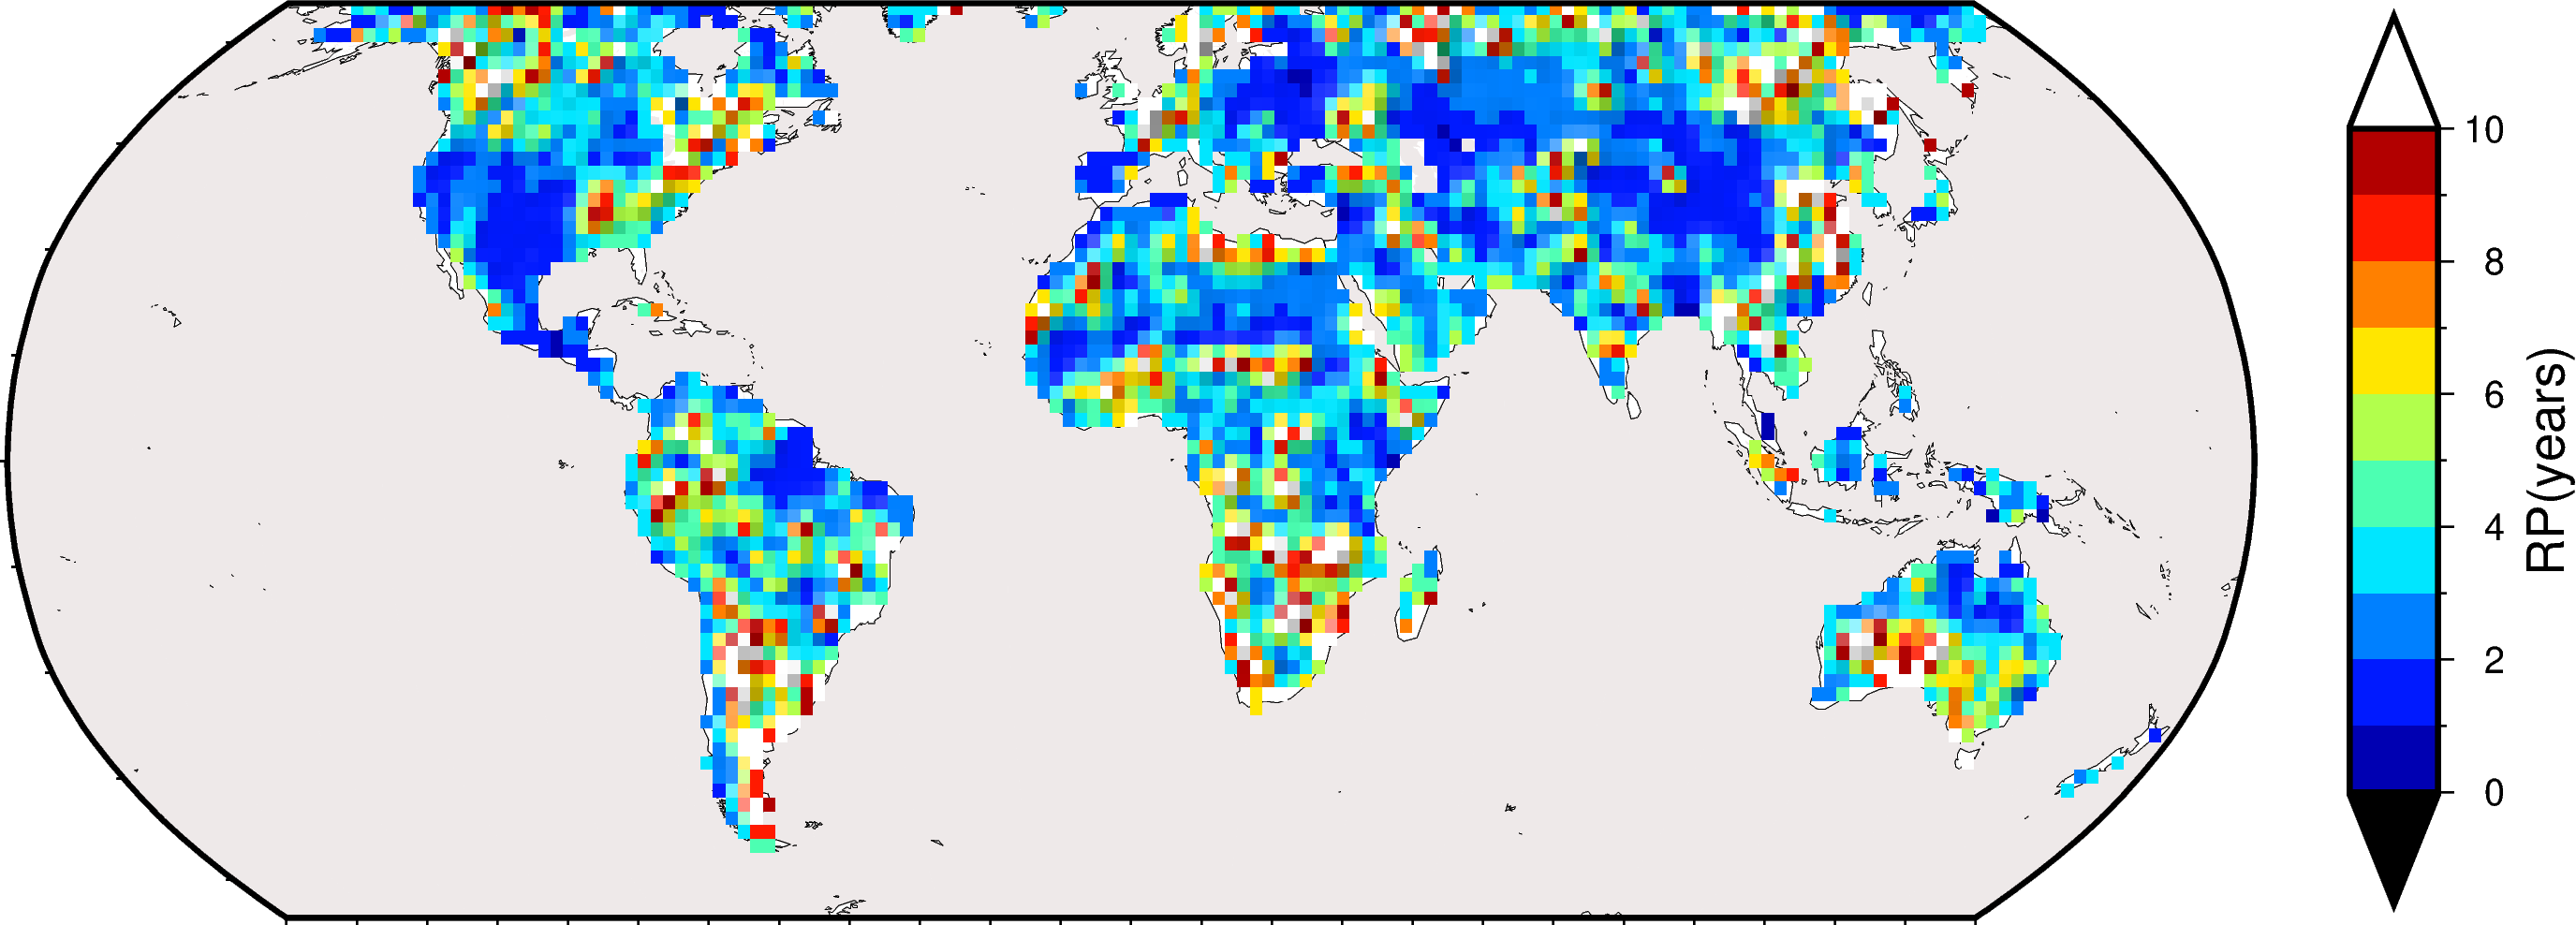

In [68]:
df=pd.read_csv('L:/codes_paper1/supplimentary_plots/Data_for_supplimentary_plots/RP_spatial.txt',sep='\t',header=None).to_numpy()

# print(df.shape)
lat=np.arange(-90,90,2)
lon=np.arange(-178,182,2)

datf=Latlon_to_xarray2d_format(df,lat,lon)
print(f"size of the data : {datf.shape}")
data1=xr.DataArray(data=datf[0,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
data1
df.size

fig=gmt.Figure()
fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25],projection="N8i", water="snow2")
gmt.makecpt(cmap="jet", series=[0, 10, 1])
fig.grdimage(grid=data1,nan_transparent=True, frame="f",shading=True,interpolation="b")
fig.colorbar(position='JMR+w6c/0.8c+v+e1c',
            frame=["a2f","x+lRP(years)"],
            scale=1,
            )
fig.show()

fig.savefig('L:/codes_paper1/supplimentary_plots/RP_obs.png',transparent=True)
# print(f"figure object: {fig}")

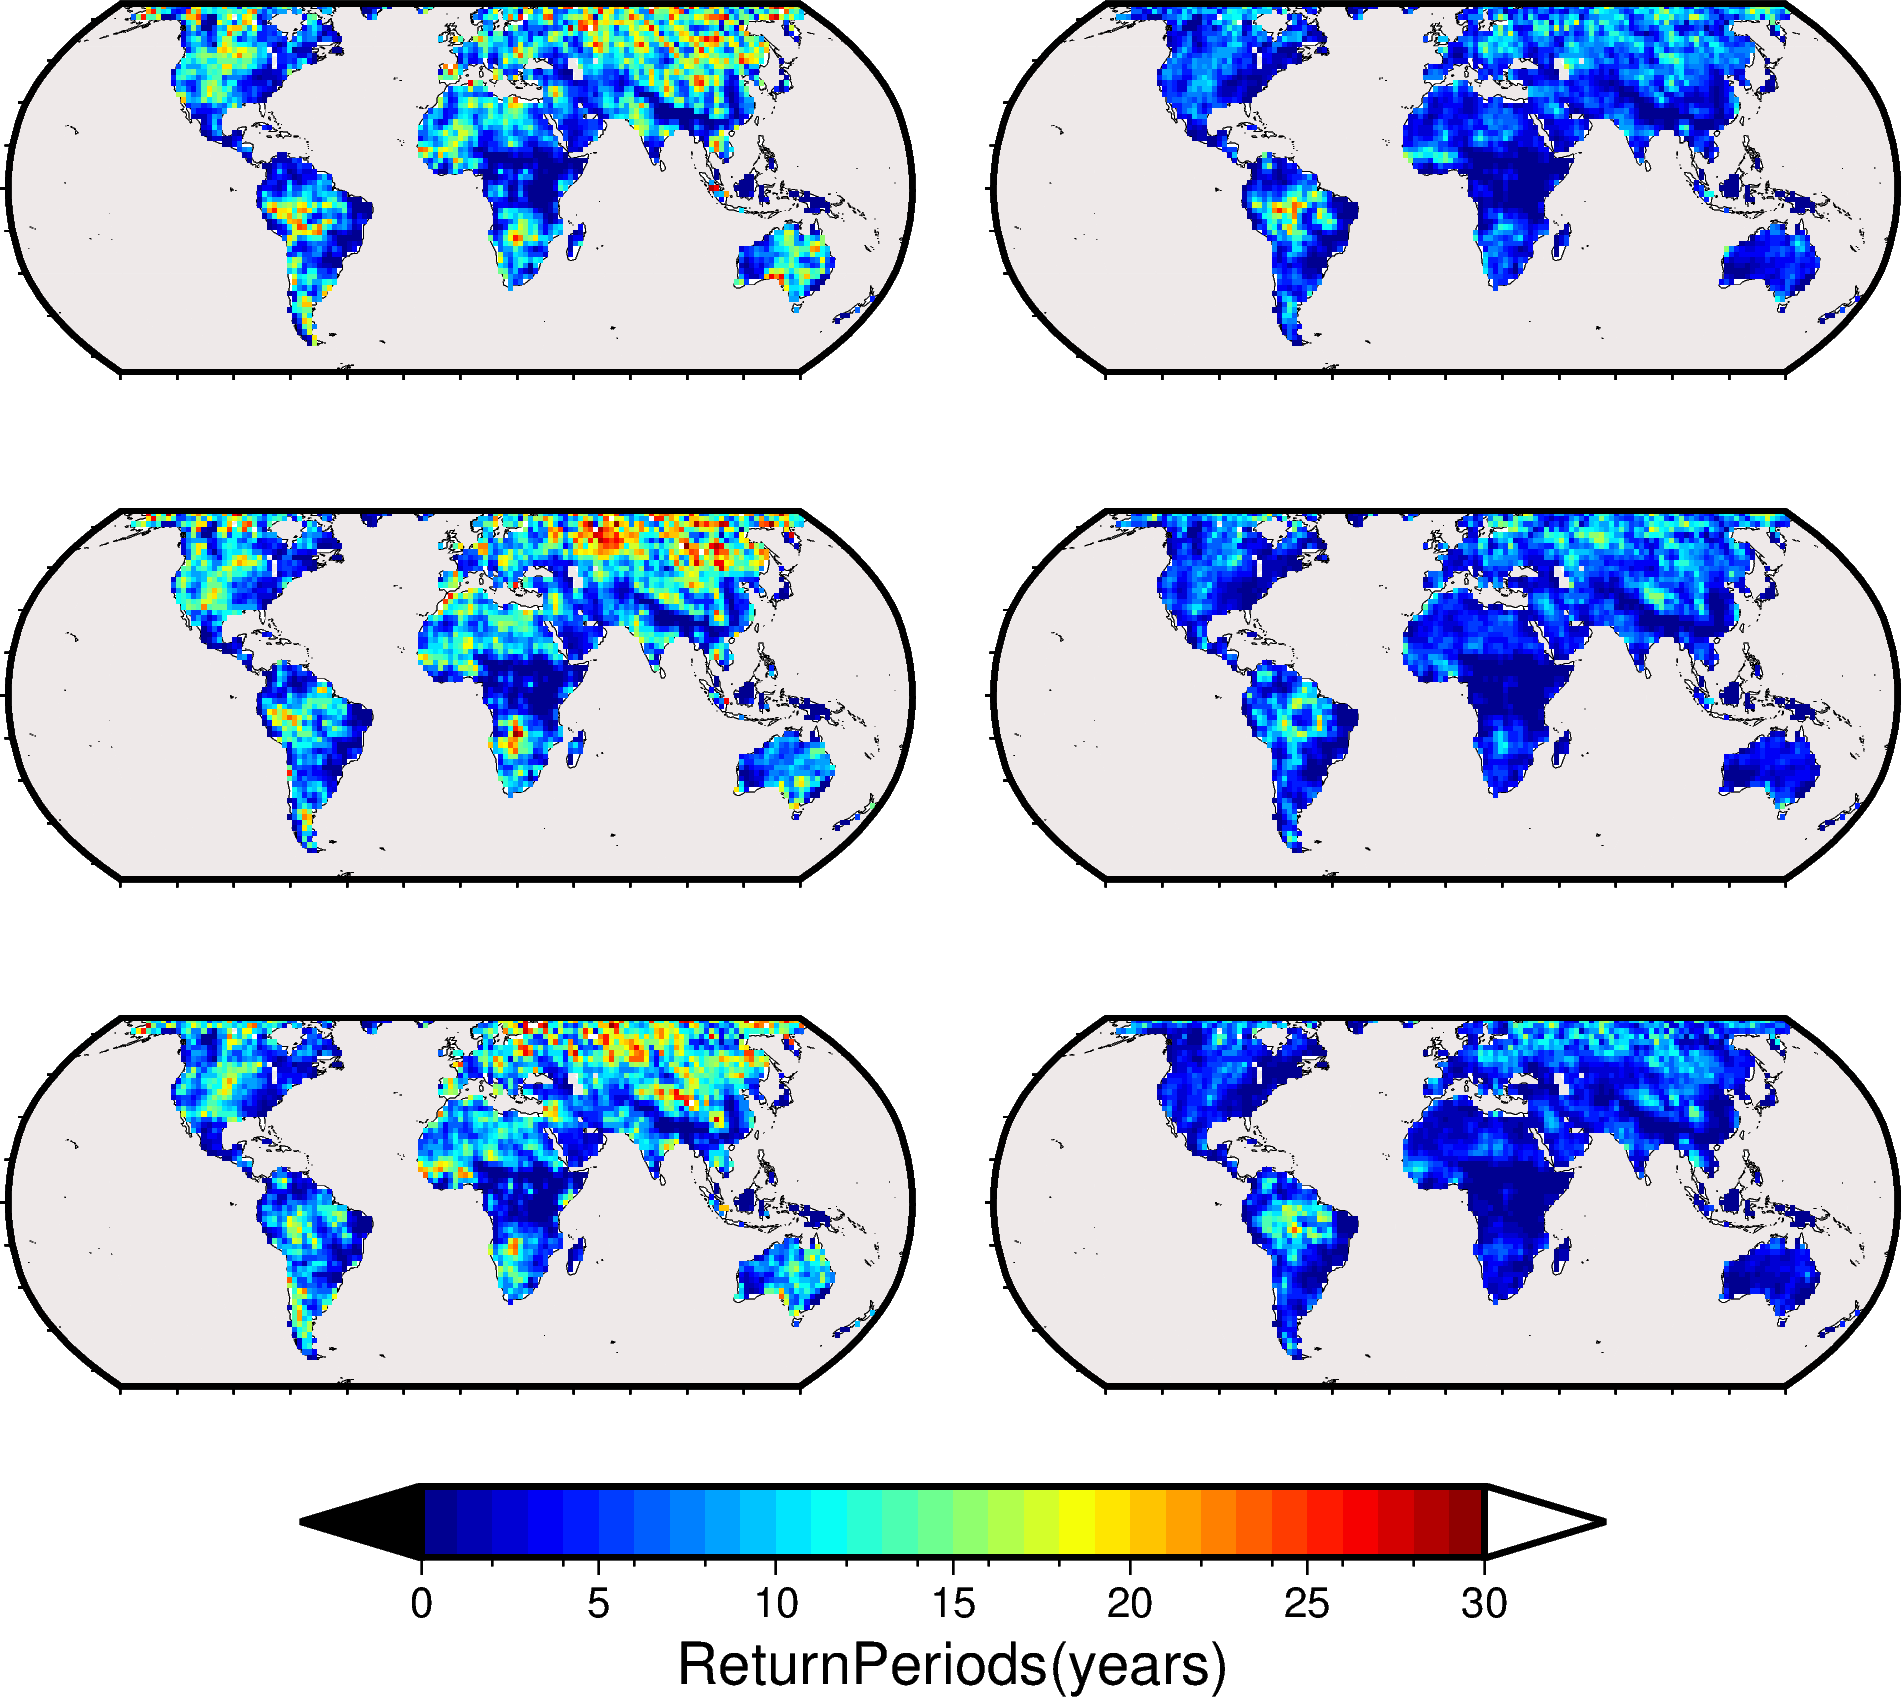

In [69]:
df=pd.read_csv('L:/codes_paper1/supplimentary_plots/Data_for_supplimentary_plots/RP_spatial.txt',sep='\t',header=None).to_numpy()

# print(df.shape)
lat=np.arange(-90,90,2)
lon=np.arange(-178,182,2)

datf=Latlon_to_xarray2d_format(df,lat,lon)

fig = gmt.Figure()
gmt.makecpt(cmap="jet", series=[0, 30, 1])
with fig.subplot(
    nrows=3,
    ncols=2,
    figsize=("16c", "12c"),
    autolabel=False,
    frame=["f"],
    margins=["0.1c", "0.2c"],
#     title="Change in number of CDHW events",
):
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[0, 0])
    data1=xr.DataArray(data=datf
           [1,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[1, 0])
    data1=xr.DataArray(data=datf
           [2,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[2, 0])
    data1=xr.DataArray(data=datf
           [3,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[0, 1])
    data1=xr.DataArray(data=datf
           [4,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[1, 1])
    data1=xr.DataArray(data=datf
           [5,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
    fig.coast(shorelines="1/0.1p",region=[-180, 180, -66, 66.25], projection="N?", water="snow2", panel=[2, 1])
    data1=xr.DataArray(data=datf
           [6,:,:],dims=['x','y'],coords={'y':np.arange(-178,182,2),'x':np.arange(-90,90,2)})
    fig.grdimage(grid=data1,nan_transparent=True,frame="f",interpolation="b")
    
## colorbar
fig.colorbar(position='x3.5c/-1.3c+w9c/0.6c+h+e1c',
            frame=["a5f","x+lReturnPeriods(years)"],
            scale=1,
#              Q=[10, 20, 30],
            )
fig.show()
fig.savefig('L:/codes_paper1/supplimentary_plots/RP_SSPs.png',transparent=True)